C:\Users\umama\AppData\Local\Temp\ipykernel_14916\4105506719.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['Frequency'], palette='coolwarm')


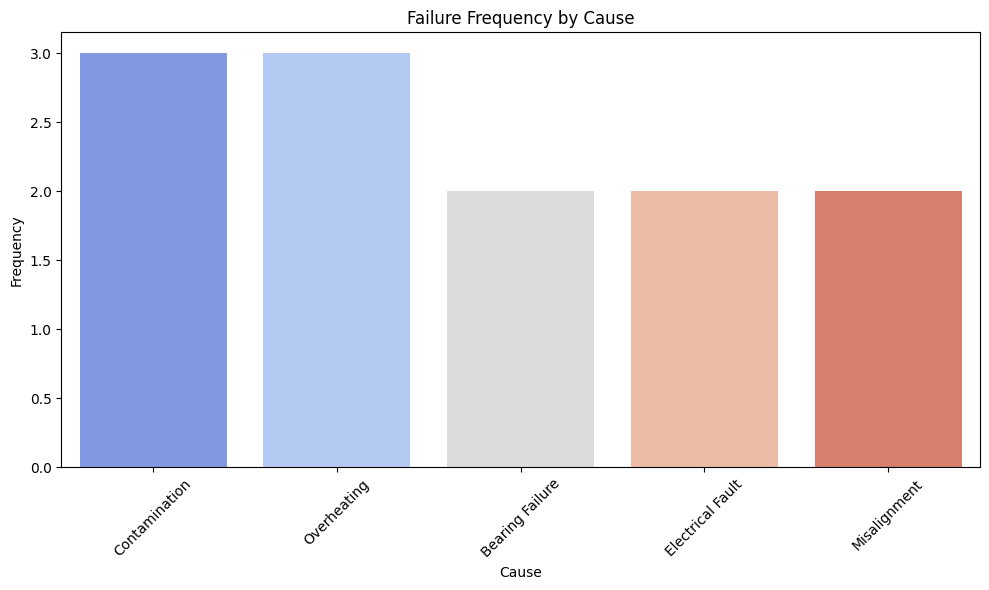

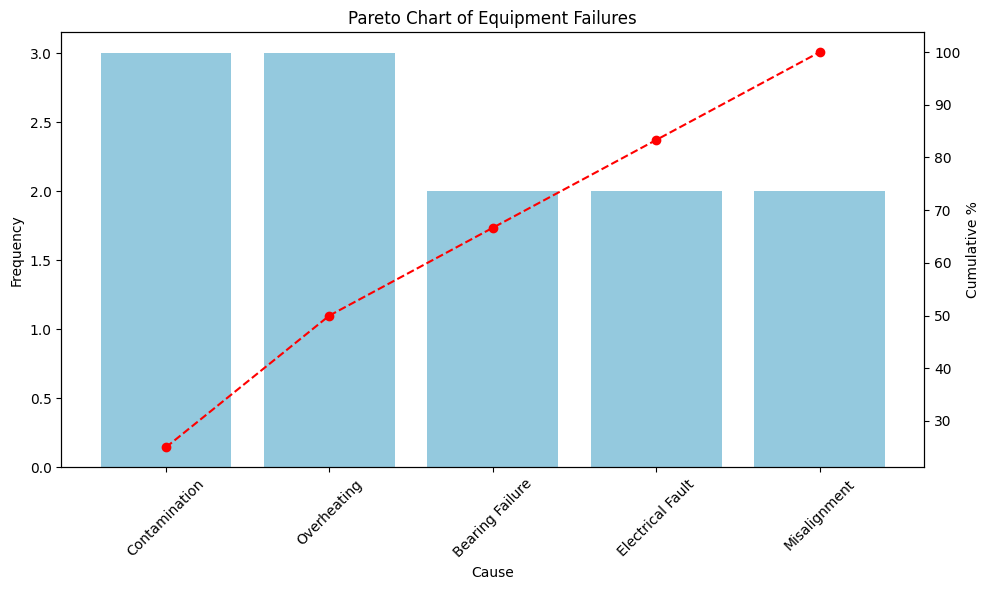

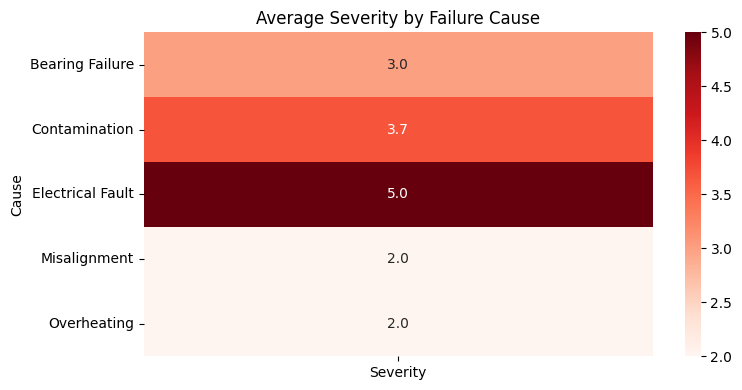

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated equipment failure data
data = {
    'Cause': [
        'Bearing Failure', 'Overheating', 'Electrical Fault', 'Misalignment',
        'Contamination', 'Bearing Failure', 'Overheating', 'Electrical Fault',
        'Contamination', 'Overheating', 'Misalignment', 'Contamination'
    ],
    'Downtime (hrs)': [5, 3, 8, 4, 6, 7, 4, 6, 3, 5, 2, 7],
    'Severity': [3, 2, 5, 3, 4, 3, 2, 5, 3, 2, 1, 4]
}

df = pd.DataFrame(data)

# Group by cause and summarize
summary = df.groupby('Cause').agg({
    'Downtime (hrs)': 'sum',
    'Severity': 'mean',
    'Cause': 'count'
}).rename(columns={'Cause': 'Frequency'})

summary = summary.sort_values(by='Frequency', ascending=False)

# Plot 1: Failure Frequency by Cause
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y=summary['Frequency'], palette='coolwarm')
plt.title('Failure Frequency by Cause')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Pareto Chart (Frequency vs Cumulative %)
summary['Cumulative %'] = summary['Frequency'].cumsum() / summary['Frequency'].sum() * 100

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart
sns.barplot(x=summary.index, y=summary['Frequency'], ax=ax1, color='skyblue')
ax1.set_ylabel('Frequency')
ax1.set_title('Pareto Chart of Equipment Failures')
ax1.tick_params(axis='x', rotation=45)

# Cumulative percentage line
ax2 = ax1.twinx()
ax2.plot(summary.index, summary['Cumulative %'], color='red', marker='o', linestyle='--')
ax2.set_ylabel('Cumulative %')

plt.tight_layout()
plt.show()

# Plot 3: Heatmap of Severity vs Cause
severity_pivot = df.pivot_table(index='Cause', values='Severity', aggfunc='mean')
plt.figure(figsize=(8, 4))
sns.heatmap(severity_pivot, annot=True, cmap='Reds', fmt=".1f")
plt.title('Average Severity by Failure Cause')
plt.tight_layout()
plt.show()